In [1]:
from networkx.algorithms import bipartite
import csv
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

In [2]:
movies = []
with open('SENA_DataSet - MCUActorList.csv') as f:
    file = csv.reader(f)
    for line in file:
        movies.append(line[0])
movies

['Iron Man',
 'The incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The first Avenger',
 "Marvel's the Avengers",
 'Iron Man 3',
 'Thor: The dark world',
 'Captain America : The Winter Soldier',
 'Guardians Of the Galaxy',
 'Avengers : Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man:Homecoming',
 'Thor:Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain-Marvel',
 'Avengers:Endgame',
 'Spider-Man:Far From Home',
 'Black Widow',
 'Shang-Chi and the Legend of the Ten Rings',
 'Eternals',
 'Spider-Man: No Way Home',
 'Doctor Strange in the Multiverse of Madness',
 'Thor: Love and Thunder']

In [3]:
actors = set()
with open('SENA_DataSet - MCUActorList.csv') as f:
    file = csv.reader(f)
    for line in file:
        for actor in line[1:]:
            if actor != '':
                actors.add(actor)
actors

{'Andrew Garfield',
 'Angelina Jolie',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Awkwafina',
 'Barry Keoghan',
 'Ben Kingsley',
 'Ben Mendelsohn',
 'Benedict Cumberbatch',
 'Benedict Wong',
 'Bradely Cooper',
 'Bradley Cooper',
 'Brie Larson',
 'Cate Blanchett',
 'Chadwick Boseman',
 'Chiswetel Ejiofor',
 'Chris Evans',
 'Chris Hemsworth',
 'Chris Patt',
 'Christian Bale',
 'Corey Stall',
 'Dave Bautista',
 'David Harbour',
 'Don Cheadle',
 'Edward Norton',
 'Elisabeth Olsen',
 'Evangeline Lilly',
 'Florence Pugh',
 'Gemma Chan',
 'Guy Pearce',
 'Gweneth Paltrow',
 'Hugo Weaving',
 'Idris Elba',
 'Jacob Batalon',
 'Jake Gyllenhaal',
 'Jeremy Renner',
 'Josh Brolin',
 'Kumail Nanjiani',
 'Letitia Wright',
 'Liv Tyler',
 "Lupita Nyong'o",
 'Mark Ruffalo',
 'Martin Freeman',
 'Mengâ€™er Zhang',
 'Michael B. Jordan',
 'Michael Douglas',
 'Michael Keaton',
 'Micheal Pena',
 'Mickey Rourke',
 'Natalie Portman',
 'Paul Rudd',
 'Racheal McAdams',
 'Rachel Weisz',
 'Richard Madden',
 'Robert Dow

In [4]:
G = nx.Graph()

In [5]:
G.add_nodes_from(actors,bipartite='Actors')
G.add_nodes_from(movies,bipartite='Movies')

In [6]:
with open('SENA_DataSet - MCUActorList.csv') as f:
    file = csv.reader(f)
    for line in file:
        movie = line[0]
        for i in line[1:]:
            if i != '':
                G.add_edge(movie,i)

In [7]:
actor_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Actors']
movie_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Movies']
print('Actors : ',actor_nodes,end='\n\n')
print('Movies : ',movie_nodes,end='\n\n')
print('Is Bipartite : ',bipartite.is_bipartite(G))


Actors :  ['Chadwick Boseman', 'Michael B. Jordan', 'Corey Stall', 'Mengâ€™er Zhang', 'Martin Freeman', 'Barry Keoghan', 'Benedict Wong', 'Angelina Jolie', 'Samuel L. Jackson', 'Josh Brolin', 'Brie Larson', 'Gemma Chan', 'Rachel Weisz', 'Edward Norton', 'Liv Tyler', 'Zoe Saldana', 'Ben Mendelsohn', 'Terrence Howard', 'Tim Roth', 'Mickey Rourke', 'Scarlett Johansson', 'Sebastian Stan', 'Natalie Portman', 'Evangeline Lilly', 'Tom Hiddleston', 'David Harbour', 'Chris Hemsworth', 'Micheal Pena', 'Andrew Garfield', 'Idris Elba', 'Kumail Nanjiani', 'Dave Bautista', 'Anthony Mackie', 'Bradley Cooper', 'Christian Bale', 'Tom Holland', 'Jeremy Renner', 'Michael Keaton', 'Elisabeth Olsen', 'Tobey Maguire', 'Xochiti Gomez', 'Jake Gyllenhaal', 'Don Cheadle', 'Racheal McAdams', 'Taika Waititi', 'Zendaya', 'Guy Pearce', 'Chiswetel Ejiofor', 'Richard Madden', 'Florence Pugh', 'Michael Douglas', 'Hugo Weaving', 'Vin Diesel', 'Gweneth Paltrow', 'Ben Kingsley', 'Anthony Hopkins', 'Chris Patt', 'Simu Liu

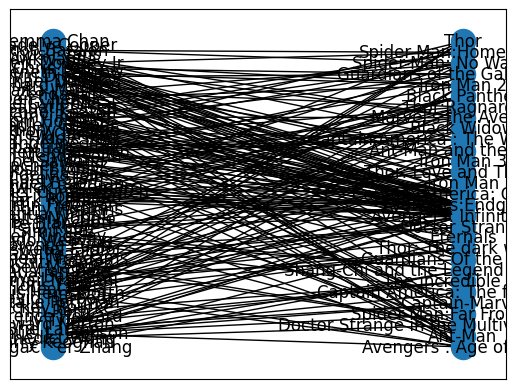

In [8]:
nx.draw_networkx(G,pos=nx.drawing.bipartite_layout(G,actors),width=1)

In [9]:
nx.write_gexf(G,'MCU_actors_ovies_bipartite.gexf')

In [14]:
B = bipartite.weighted_projected_graph(G, actors, ratio=False)
B.edges(data=True)

EdgeDataView([('Chadwick Boseman', 'Michael B. Jordan', {'weight': 1}), ('Chadwick Boseman', 'Benedict Wong', {'weight': 1}), ('Chadwick Boseman', 'Samuel L. Jackson', {'weight': 1}), ('Chadwick Boseman', 'Josh Brolin', {'weight': 2}), ('Chadwick Boseman', 'Brie Larson', {'weight': 2}), ('Chadwick Boseman', 'Zoe Saldana', {'weight': 2}), ('Chadwick Boseman', 'Scarlett Johansson', {'weight': 3}), ('Chadwick Boseman', 'Sebastian Stan', {'weight': 1}), ('Chadwick Boseman', 'Evangeline Lilly', {'weight': 2}), ('Chadwick Boseman', 'Chris Hemsworth', {'weight': 2}), ('Chadwick Boseman', 'Idris Elba', {'weight': 1}), ('Chadwick Boseman', 'Dave Bautista', {'weight': 2}), ('Chadwick Boseman', 'Bradley Cooper', {'weight': 2}), ('Chadwick Boseman', 'Anthony Mackie', {'weight': 3}), ('Chadwick Boseman', 'Tom Holland', {'weight': 3}), ('Chadwick Boseman', 'Jeremy Renner', {'weight': 3}), ('Chadwick Boseman', 'Elisabeth Olsen', {'weight': 3}), ('Chadwick Boseman', 'Don Cheadle', {'weight': 1}), ('Ch

In [15]:
nx.write_gexf(B,'MCU_actors_projections.gexf')